In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필요한 라이브러리 import

In [ ]:
import pandas as pd #Analysis
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis
from scipy.stats import norm #Analysis
from sklearn.preprocessing import StandardScaler #Analysis
from scipy import stats #Analysis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
from textblob import TextBlob
from nltk import word_tokenize, pos_tag, ne_chunk
import os
import string
color = sns.color_palette()
import spacy
import re
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb
import os
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from nltk import FreqDist
import copy
from sklearn.metrics import confusion_matrix
import seaborn as sn

### 데이터를 불러오고 확인해 봅니다.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EST AI/프로젝트/프로젝트 2/drugsCom_raw.tsv", sep = '\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


drugName : 약 이름
condition: 증상
review : 리뷰
rating : 평가점수 date : 리뷰 작성 날짜
usefulCount: 공감한 개수 = 좋아요 개수

In [ ]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
df['condition'].value_counts()

condition
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: count, Length: 884, dtype: int64

In [ ]:
df['rating'].value_counts()

rating
10.0    50989
9.0     27531
1.0     21619
8.0     18890
7.0      9456
5.0      8013
2.0      6931
3.0      6513
6.0      6343
4.0      5012
Name: count, dtype: int64

In [ ]:
df['rating'].describe()

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

### 결측치 시각화

In [ ]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

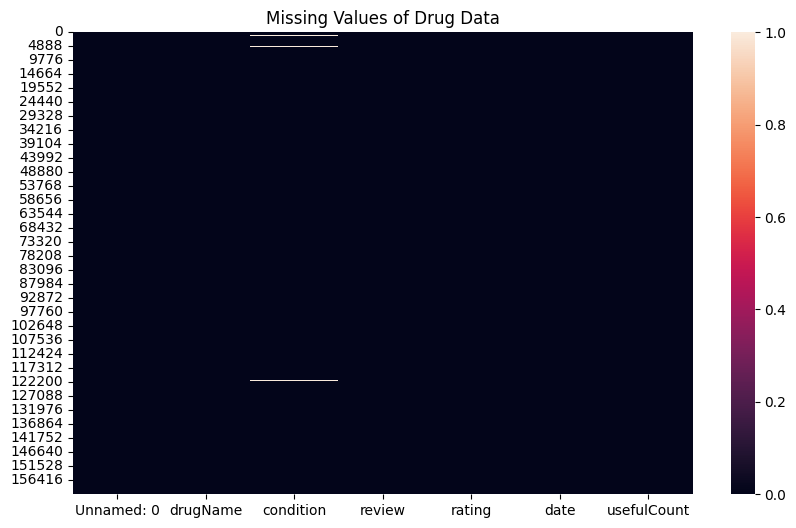

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values of Drug Data')
plt.show()

### 결측치와 필요없는 열들을 제거합니다.

In [ ]:
df.dropna(inplace=True)
df.drop(columns = ['Unnamed: 0', 'date'], inplace = True) #중요하지 않은 변수들은 제거했습니다.

### 빈도가 높은 약과 증상들을 확인해 봅니다.

In [ ]:
df['drugName'].value_counts().head(20)

drugName
Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Phentermine                           1538
Sertraline                            1353
Escitalopram                          1287
Mirena                                1242
Implanon                              1102
Gabapentin                            1042
Bupropion                             1017
Venlafaxine                           1012
Miconazole                             998
Citalopram                             994
Medroxyprogesterone                    971
Lexapro                                952
Bupropion / naltrexone                 945
Duloxetine                             931
Name: count, dtype: int64

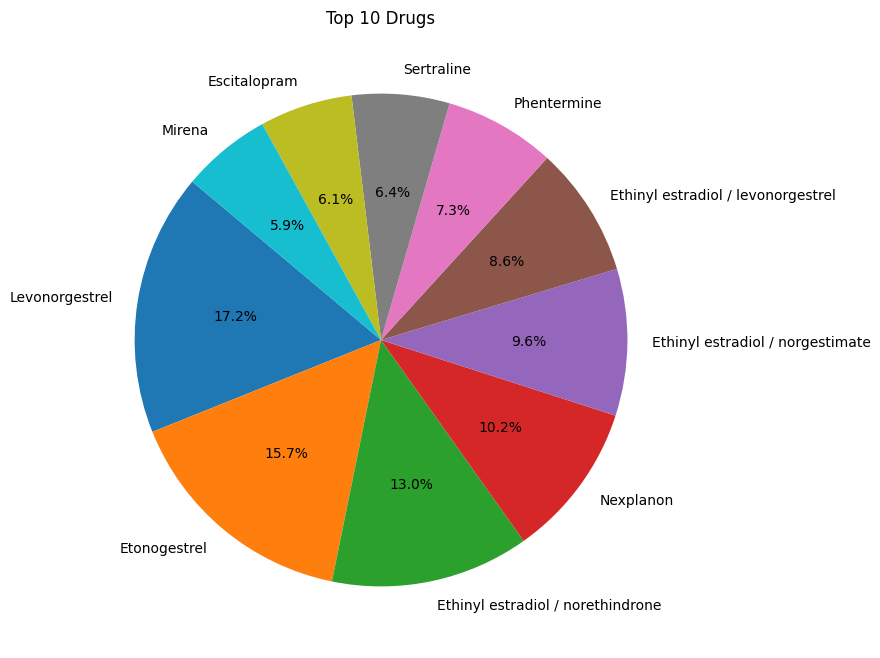

In [ ]:
# 상위 10개 약물 선택
top_drugs = df['drugName'].value_counts().head(10)

# 원형 그래프
plt.figure(figsize=(8, 8))
top_drugs.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Drugs')
plt.ylabel('')
plt.show()

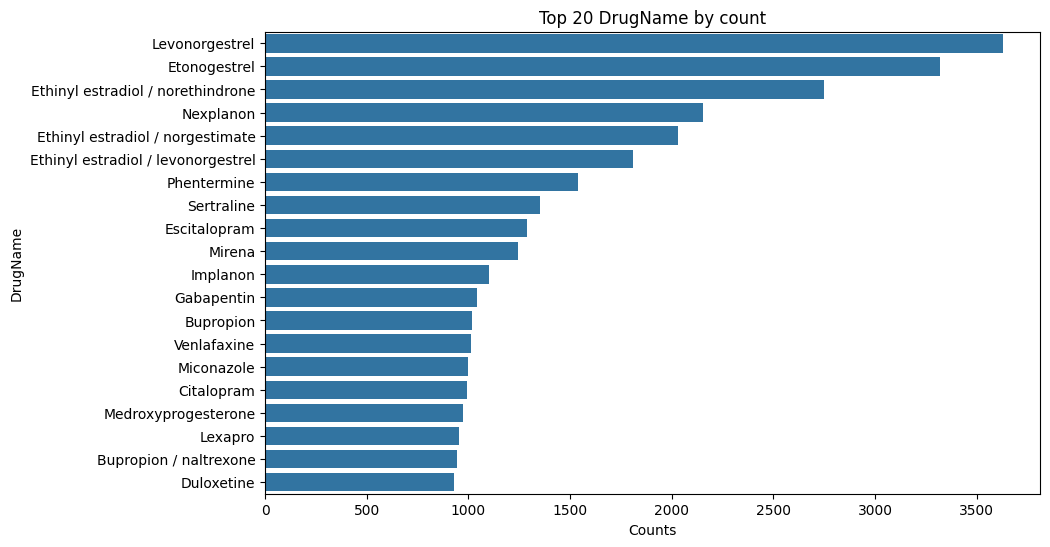

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, y = 'drugName', order = df['drugName'].value_counts().index[:20] )
plt.title('Top 20 DrugName by count')
plt.xlabel('Counts')
plt.ylabel('DrugName')
plt.show()

Levonorgestrel : norgestrel의 활성형 이성체(경구용 피임제)
Etonogestrel : Desogestrel의 활성대사물 (주사 삽입형 피임제)
Ethinyl estradiol / norethindrone : 이디닐에스트라디올과 노레틴드론 호르몬 함유(복합 경구 피임제)
Nexplanon : 임플라논 엔엑스티 이식제 (이식형 피임제)
Ethinyl estradiol / norgestimate : 에티닐에스트라디올과 노르게스트레이트 함유 (복합 경구 피임제)
Ethinyl estradiol / levonorgestrel: 에티닐에스트라디올과 레보노르게스트렐 함유(복합 경구 피임제)
Phentermine :(펜타민) 비만환자에게 체중감량의 보조요법으로 단기간 사용하는 식욕억제제
Sertraline :(세트랄린) 항우울증, 항불안제(경구용)
Escitalopram :(에스시탈로프람) 우울증 치료제(경구용) => 세로토닌의 작용을 선택적으로 높이는 약물
Mirena :(미레나) 피임기구(피임장치)
Implanon : 피임기구(이식형 피임제)
Gabapentin : 신경통 및 발작 치료제, 특정 신경통 치료(경구용)
Bupropion : 우울증, 니코틴 중독 치료제(경구용)
Venlafaxine : 우울증, 공황장애, 패닉장애(경구용)
Miconazole : 진균 감염 치료제 ex) 피부, 발포, 혀 감염 (피부 도포)
Medroxyprogesterone : 피임, 월경장애 치료(근육주사제)
Citalopram : 우울증, 공항장애(경구용)
Lexapro : 우울증, 공항장애(경구용)
Bupropion / naltrexone : 체중 감량 약물(경구용)
Duloxetine : 우울증, 고위험 혈압, 요실금, 신경통 치료(경구용)

In [ ]:
df['condition'].value_counts().head(20)

condition
Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: count, dtype: int64

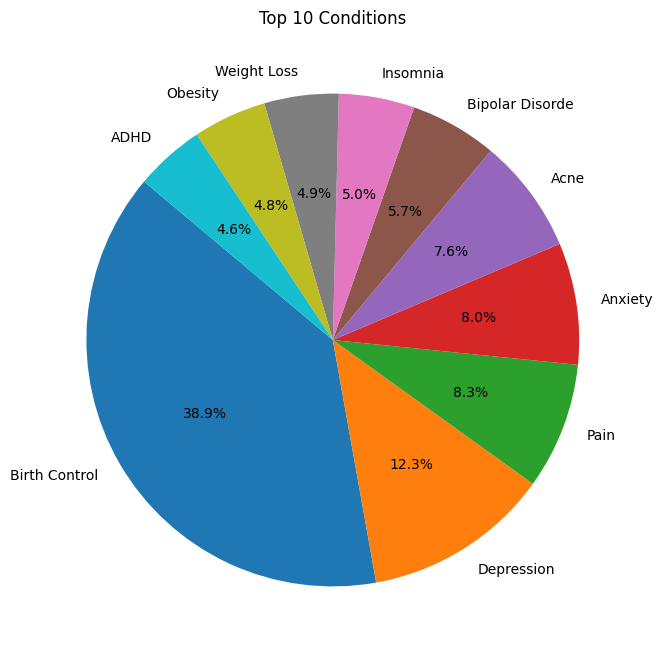

In [ ]:
# 상위 10개 증상 선택
top_conditions = df['condition'].value_counts().head(10)

# 원형 그래프
plt.figure(figsize=(8, 8))
top_conditions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Conditions')
plt.ylabel('')
plt.show()

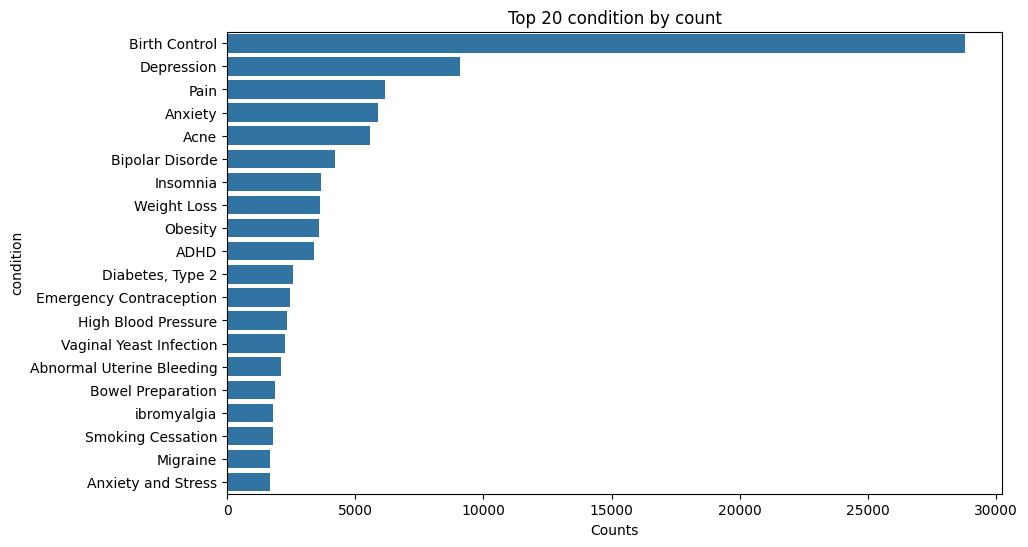

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, y = 'condition', order = df['condition'].value_counts().index[:20] )
plt.title('Top 20 condition by count')
plt.xlabel('Counts')
plt.ylabel('condition')
plt.show()

Birth Control : 피임
Depression : 우울증
Pain : 통증
Anxiety : 불안
Acne : 여드름
Bipolar Disorder : 양극성 장애
Insomnia : 불면증
Weight Loss : 체중 감량
Obesity : 비만
ADHD : 주의력 결핍 과잉행동 장애
Diabetes, Type2 : 당뇨병, 제 2형
Emergency Contraception : 긴급 피임
High Blood Pressure : 고혈압
Vaginal Yeast Infection : 질 상 칸디다 감염
Abnormal Uterine Bleeding : 자궁 이상 출혈
BowelPreparation : 장 내 시술 전 준비(내시경이나 수술 전에 장 청소용)
Fibromyalgia : 섬유근육통(만성적인 근육통, 피로감, 수면장애 같은 질병)
Smoking Cessation : 흡연 중단(금단현상)
Migraine : 편두통(심한 두통을 특징으로하는 발작성 두통)
Anxiety and Stress : 일상생활에서 불안과 스트레스

### 증상 당 몇개의 약이 있는지 알아봅니다.

Text(0.5, 1.0, 'Top20 : The number of drugs per condition')

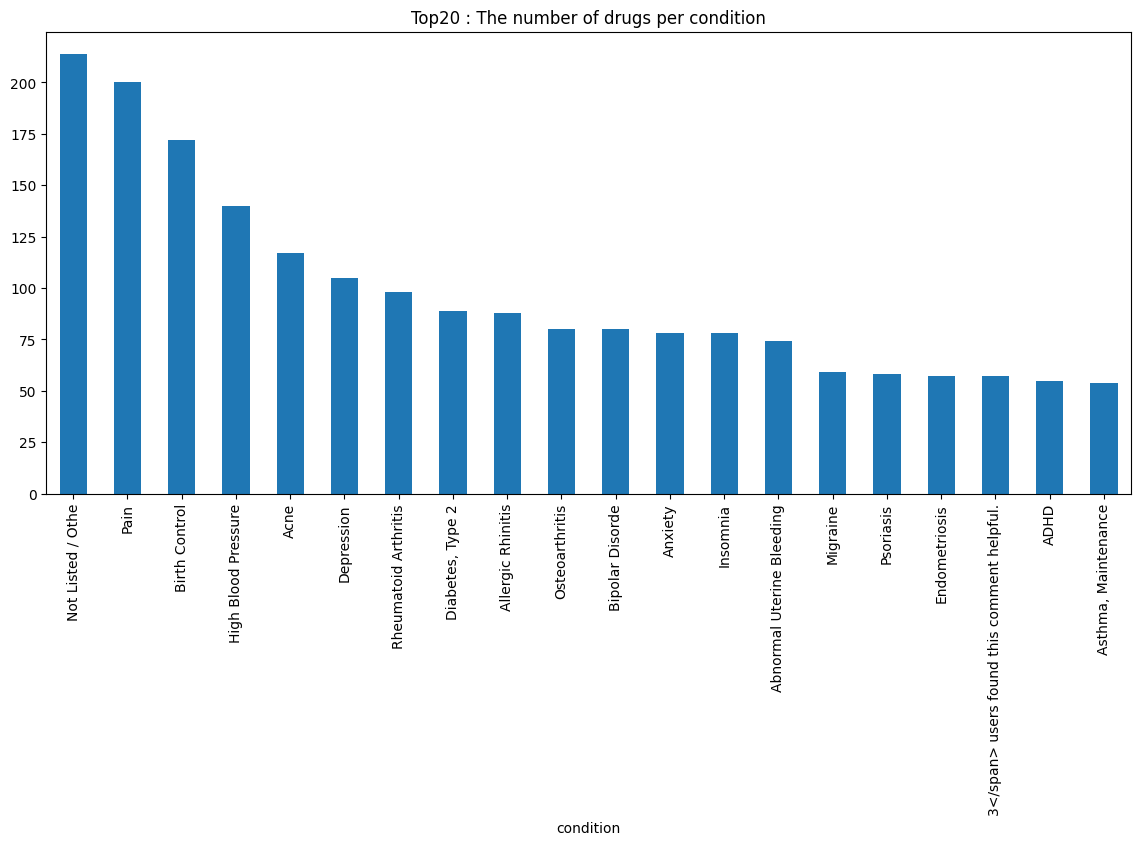

In [ ]:
condition_df=df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_df=pd.DataFrame(condition_df).reset_index()
condition_df[:20].plot(kind='bar', x='condition', y='drugName', figsize=(14, 6), legend=False)
plt.title('Top20 : The number of drugs per condition')

### 평점과 usefulcounts, 상관관계를 알아봅니다.

Text(0.5, 1.0, 'Count of rating values')

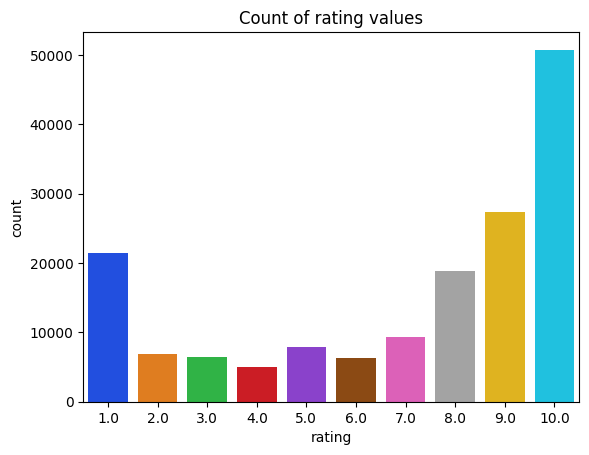

In [ ]:
sns.countplot(x='rating',data=df,palette='bright')
plt.title('Count of rating values')

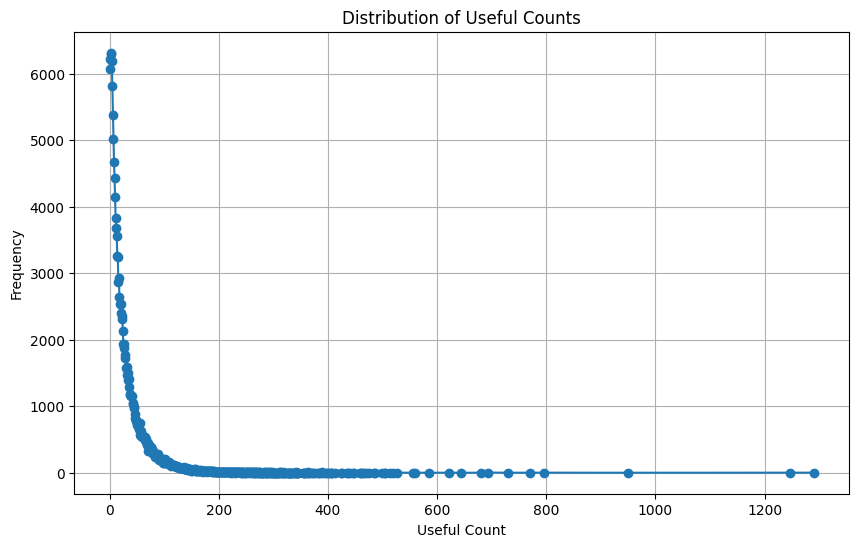

In [ ]:
useful_counts = df['usefulCount'].value_counts()

# 빈도수 데이터를 'usefulcount' 값에 따라 정렬
useful_counts= useful_counts.sort_index()

# 선형 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(useful_counts.index, useful_counts.values, marker='o', linestyle='-')
plt.title('Distribution of Useful Counts')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

상관계수: 0.23437939849868883


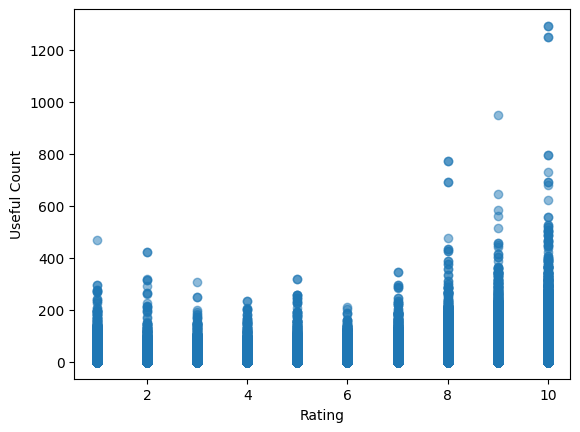

In [ ]:
import numpy as np

rating = df['rating']
useful_count = df['usefulCount']

correlation = np.corrcoef(rating, useful_count)[0, 1]
print("상관계수:", correlation)

#시각화
plt.scatter(rating, useful_count, alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

### 약 별로 평점 비율을 확인해 봅시다

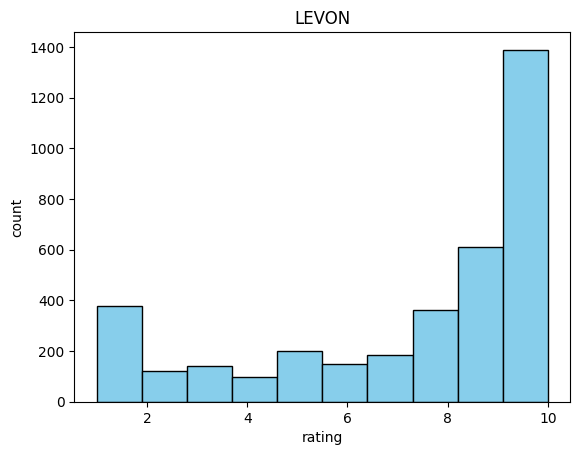

In [ ]:
le_data = df[df['drugName'] == 'Levonorgestrel']
plt.hist(le_data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('LEVON')
plt.show()


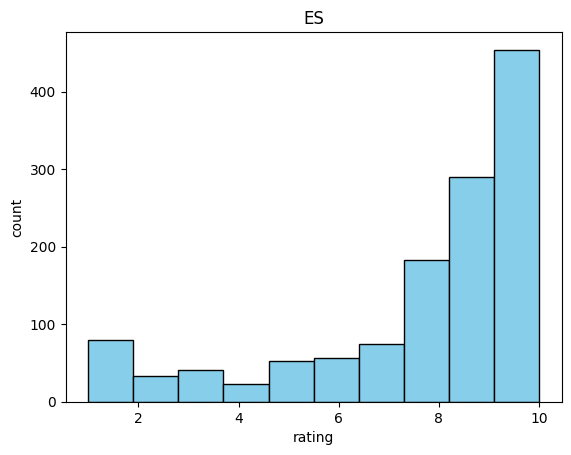

In [ ]:
es_data = df[df['drugName'] == 'Escitalopram']
plt.hist(es_data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('ES')
plt.show()

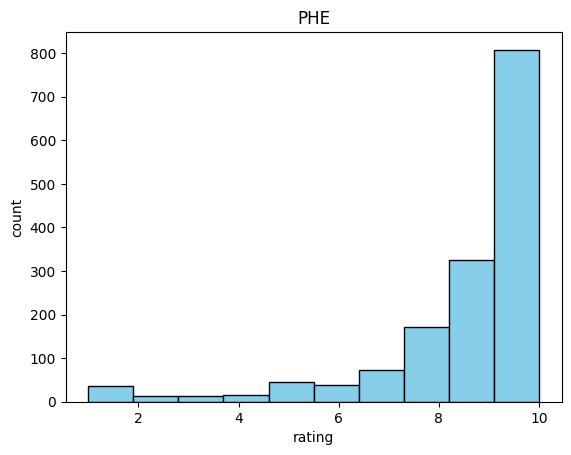

In [ ]:
phe_data = df[df['drugName'] == 'Phentermine']
plt.hist(phe_data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('PHE')
plt.show()

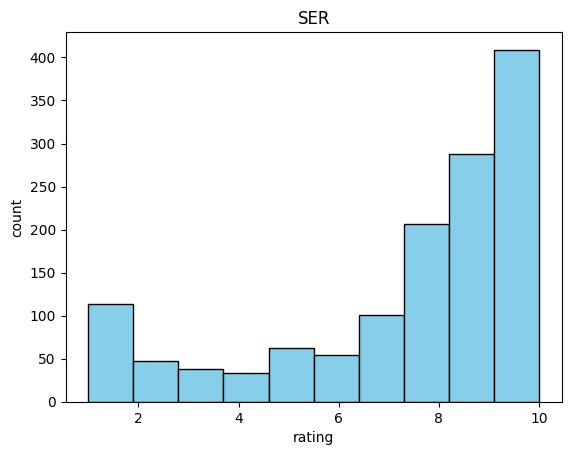

In [ ]:
ser_data = df[df['drugName'] == 'Sertraline']
plt.hist(ser_data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('SER')
plt.show()

In [ ]:
df['drugName'].unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Mavik', 'Aldomet',
       'Grifulvin V'], dtype=object)

### 전체 데이터 셋 중 긍정/부정 비율을 확인합니다

In [ ]:
feeling = [0 if rating in range(0,6) else 1 for rating in df['rating']]
pos_cnt = len([x for x in feeling if x==1])
neg_cnt = len([x for x in feeling if x==0])
print(("긍정비율 : {:.4f}%,".format(pos_cnt/len(feeling))+" 긍정개수 : {}개".format(pos_cnt)))
print(("부정비율 : {:.4f}%,".format(neg_cnt/len(feeling))+" 부정개수 : {}개".format(neg_cnt)))

긍정비율 : 0.7021%, 긍정개수 : 112611개
부정비율 : 0.2979%, 부정개수 : 47787개


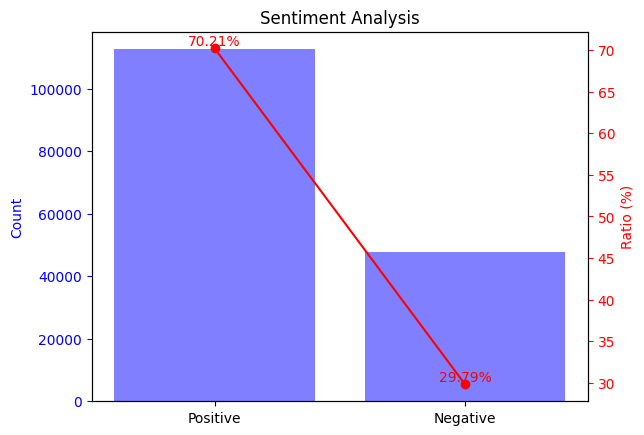

In [ ]:
pos_ratio = pos_cnt / len(feeling) * 100
neg_ratio = neg_cnt / len(feeling) * 100

labels = ['Positive', 'Negative']
count = [pos_cnt, neg_cnt]
ratio = [pos_ratio, neg_ratio]

fig, ax1 = plt.subplots()

ax1.bar(labels, count, color='b', alpha=0.5)
ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(labels, ratio, color='r', marker='o')
ax2.set_ylabel('Ratio (%)', color='r')
ax2.tick_params('y', colors='r')

for i, r in enumerate(ratio):
    ax2.text(i, r, f'{r:.2f}%', color='r', ha='center', va='bottom')

plt.title('Sentiment Analysis')
plt.show()

### 리뷰에 어떤 단어들이 있는지 확인합니다

In [ ]:
def plot_wordcloud(text,mask=None,max_words=200,max_font_size=100,figure_size=(24,16),title=None,title_size=40,image_color=False):
    stopwords=set(STOPWORDS)
    more_stopwords={'one','br','Po','th','sayi','fo','Unknown'}
    stopwords=stopwords.union(more_stopwords)
    wordcloud=WordCloud(background_color='white',
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        random_state=42,
        width=800,
        height=400,
        mask=mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors=ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
        plt.title(title, fontdict={'size': title_size,'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()

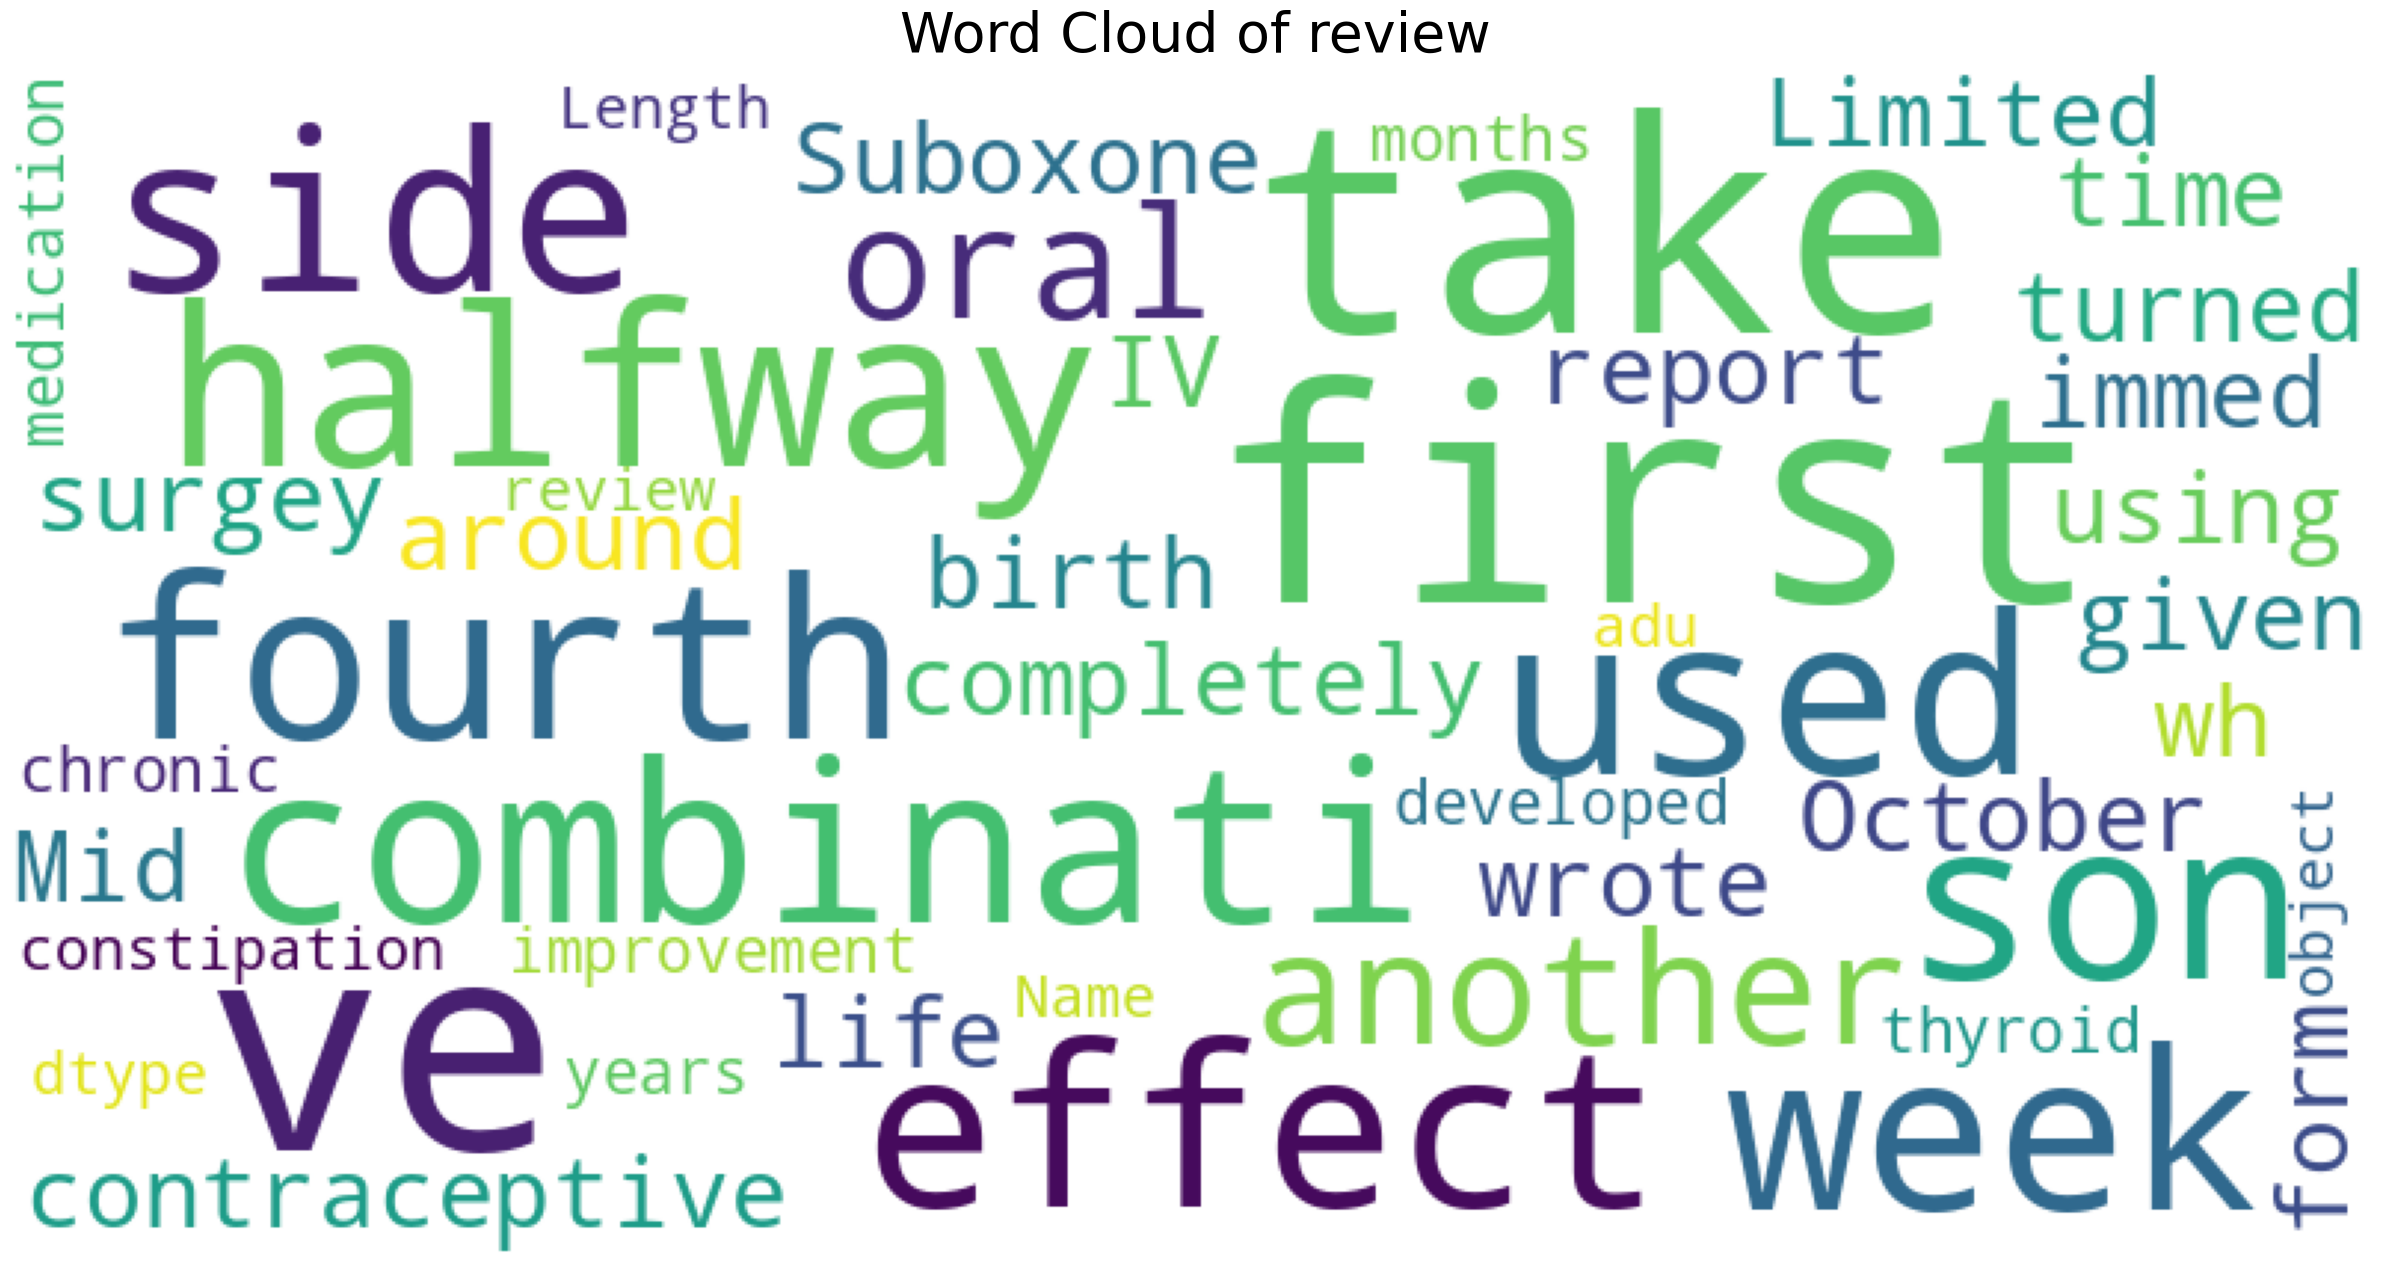

In [ ]:
plot_wordcloud(df['review'],title='Word Cloud of review')